### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

# Import Packages

In [ ]:
import os
from ads.pipeline.ads_pipeline_step import PipelineStep
from ads.pipeline.ads_pipeline import Pipeline
from ads.pipeline import CustomScriptStep
from ads.jobs import ScriptRuntime
from ads import set_auth

set_auth("resource_principal")

# Pipeline Creation

In [ ]:
# create pipeline steps from known jobs' ocids
xgboost = (
    PipelineStep("xgboost")
    .with_description("fit - xgboost model")
    .with_job_id("<xgboost job id>")
)

radnom_forest = (
    PipelineStep("radnom_forest")
    .with_description("fit - random forest model")
    .with_job_id("<random forest job id>")
)

comparison = (
    PipelineStep("comparison")
    .with_description("compare xgboost and random forest models")
    .with_job_id("<comparison job id>")
)


pipeline = (
      Pipeline("test1")
      .with_log_group_id('<your_log_group_ocid>')
      .with_step_details([xgboost, radnom_forest, comparison])
      .with_dag(["(xgboost, radnom_forest) >> comparison"])
  )


# create the pipeline
pipeline.create()

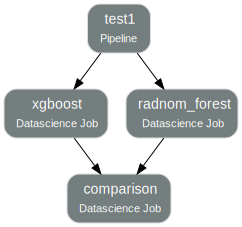

In [7]:
pipeline.show()       # visualize the pipeline

# Pipeline run

In [ ]:
# create the pipeline run
pipeline_run = pipeline.run(
    configuration_override_details = {
    "environment_variables":{'TREES': '50','DEPTH':'5', 'LRATE':'0.01'}
    }
)

# view status
print(pipeline_run.status)

# watch the pipeline run logs
pipeline_run.watch()

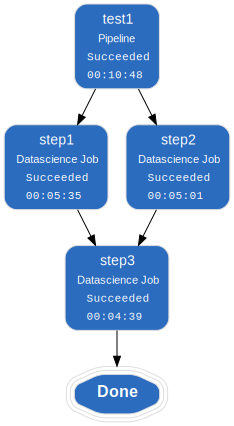

In [4]:
pipeline_run.show()